In [1]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
%matplotlib inline

import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.offline import plot

#for offline plotting
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True) 

In [4]:
infos = pd.read_csv('C:/Users/Shreshth Arora/Desktop/Programming/Python/Projects/infosys.csv')
infos.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-04-22,717.049988,725.750000,715.000000,721.049988,637.257385,6455426
1,2019-04-23,723.900024,730.000000,718.400024,728.200012,643.576721,5516668
2,2019-04-24,728.200012,737.900024,724.000000,736.450012,650.867859,8285120
3,2019-04-25,736.450012,737.650024,727.049988,728.549988,643.885986,8005235
4,2019-04-26,731.000000,739.799988,729.000000,738.000000,652.237793,6895168


In [5]:
infos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1235 entries, 0 to 1234
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1235 non-null   object 
 1   Open       1235 non-null   float64
 2   High       1235 non-null   float64
 3   Low        1235 non-null   float64
 4   Close      1235 non-null   float64
 5   Adj Close  1235 non-null   float64
 6   Volume     1235 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 67.7+ KB


In [6]:
infos['Date'] = pd.to_datetime(infos['Date'])

In [7]:
print(f'Dataframe contains stock prices between {infos.Date.min()} {infos.Date.max()}') 
print(f'Total days = {(infos.Date.max()  - infos.Date.min()).days} days')

Dataframe contains stock prices between 2019-04-22 00:00:00 2024-04-19 00:00:00
Total days = 1824 days


In [8]:
infos.describe()

,Date,Open,High,Low,Close,Adj Close,Volume
count,1235,1235.000000,1235.000000,1235.000000,1235.000000,1235.000000,1.235000e+03
mean,2021-10-18 09:45:19.676113408,1283.312712,1295.878866,1270.453119,1283.121459,1218.328630,7.878391e+06
min,2019-04-22 00:00:00,509.250000,558.000000,509.250000,526.450012,477.783630,4.834070e+05
25%,2020-07-23 12:00:00,915.325012,932.250000,911.049988,921.000000,847.238434,4.828315e+06
50%,2021-10-19 00:00:00,1392.250000,1405.000000,1380.500000,1390.300049,1340.201904,6.495885e+06
75%,2023-01-12 12:00:00,1557.950012,1570.275024,1543.125000,1556.875000,1498.880005,8.871812e+06
max,2024-04-19 00:00:00,1938.550049,1953.900024,1930.500000,1939.500000,1838.948853,9.043211e+07
std,NaN,370.546561,372.392515,367.418400,370.003369,372.625109,6.006593e+06


In [9]:
infos['Date'] = pd.to_datetime(infos['Date'], errors='coerce')
infos['Open'] = pd.to_numeric(infos['Open'], errors='coerce')
infos['High'] = pd.to_numeric(infos['High'], errors='coerce')
infos['Low'] = pd.to_numeric(infos['Low'], errors='coerce')
infos['Close'] = pd.to_numeric(infos['Close'], errors='coerce')
infos['Adj Close'] = pd.to_numeric(infos['Adj Close'], errors='coerce')

<Axes: >

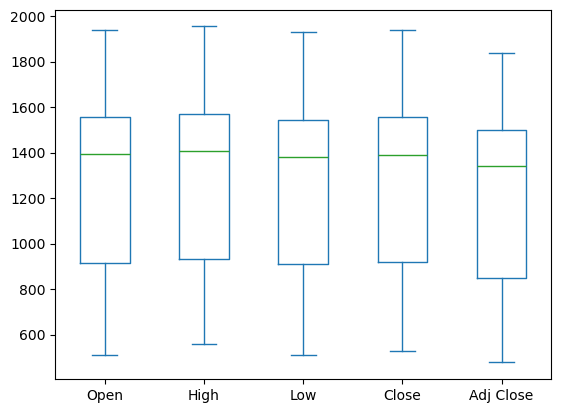

In [10]:
infos[['Open','High','Low','Close','Adj Close']].plot(kind='box')

In [11]:
# Setting the layout for our plot
layout = go.Layout(
    title='Stock Prices of Infosys',
    xaxis=dict(
        title='Date',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    ),
    yaxis=dict(
        title='Price',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    )
)

infos_data = [{'x':infos['Date'], 'y':infos['Close']}]
plot = go.Figure(data=infos_data, layout=layout)

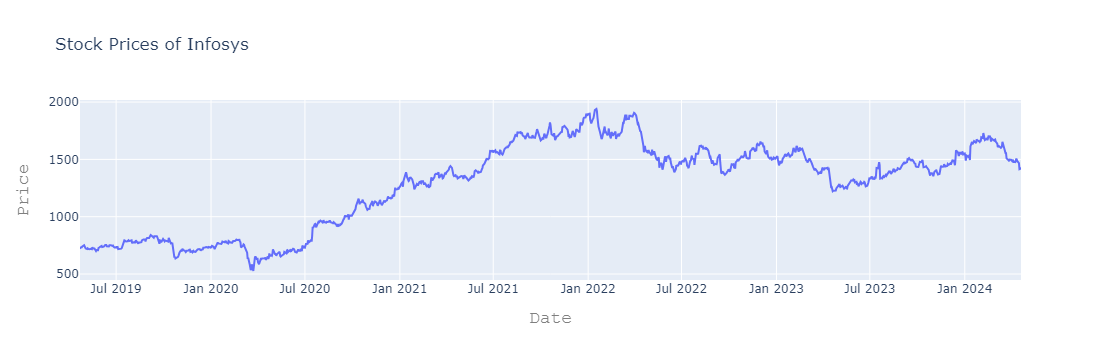

In [12]:
#plot(plot) #plotting offline
iplot(plot)

In [13]:
# Building the regression model
from sklearn.model_selection import train_test_split

#For preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

#For model evaluation
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score

In [14]:
#Split the data into train and test sets
X = np.array(infos.index).reshape(-1,1)
Y = infos['Close']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=101)

In [15]:
# Feature scaling
scaler = StandardScaler().fit(X_train)

In [16]:
from sklearn.linear_model import LinearRegression

In [17]:
#Creating a linear model
lm = LinearRegression()
lm.fit(X_train, Y_train)

LinearRegression()

In [18]:
#Plot actual and predicted values for train dataset
trace0 = go.Scatter(
    x = X_train.T[0],
    y = Y_train,
    mode = 'markers',
    name = 'Actual'
)
trace1 = go.Scatter(
    x = X_train.T[0],
    y = lm.predict(X_train).T,
    mode = 'lines',
    name = 'Predicted'
)
infos_data = [trace0,trace1]
layout.xaxis.title.text = 'Day'
plot2 = go.Figure(data=infos_data, layout=layout)

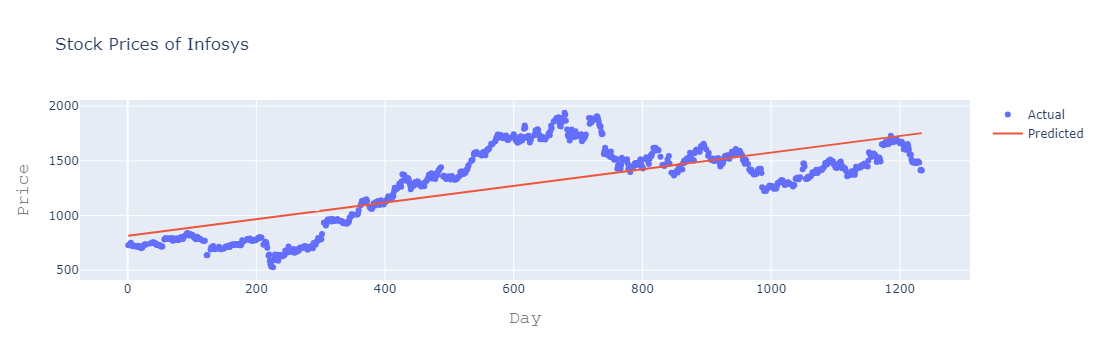

In [19]:
iplot(plot2)

In [20]:
#Calculate scores for model evaluation
scores = f'''
{'Metric'.ljust(10)}{'Train'.center(20)}{'Test'.center(20)}
{'r2_score'.ljust(10)}{r2_score(Y_train, lm.predict(X_train))}\t{r2_score(Y_test, lm.predict(X_test))}
{'MSE'.ljust(10)}{mse(Y_train, lm.predict(X_train))}\t{mse(Y_test, lm.predict(X_test))}
'''
print(scores)


Metric           Train                Test        
r2_score  0.5476137467875009	0.5900634173508625
MSE       59975.95928134592	59631.043900150806

